# <center> Module 3a - IP Networks Overview 
## <center> SYSE 549: Secure Vehicle and Industrial Networking
## <center> <img src="https://www.engr.colostate.edu/~jdaily/Systems-EN-CSU-1-C357.svg" width="400" /> 
### <center> Instructor: Dr. Jeremy Daily<br>Written By: Jerry Duggan

## Learning Objectives
By the end of this lesson, students should be able to:
1. Demonstrate socket connections.
2. Summarize the steps required to establish communication between a server and client.
3. Understand the requirements for a socket connection.

Additional learning objectives are included in subsequent notebooks.

## Basic transport control protocol (TCP) socket communication (connection-oriented)

The first program we are going to walk through shows how to communicate between a client and a server using TCP (connection-oriented) sockets.  To run the example, open the notebooks [Basic Client](./03c%20Basic%20Client.ipynb) and [Basic Server](./03b%20Basic%20Server.ipynb) in separate windows.  I recommend that you arrange your browser so you can see both notebooks on your screen simultaneously.  Then start with Step 1 - Server setup in the Basic Server notebook.

The client and the server run in separate processes (and, in fact, in most cases will be running on separate computers).  This means that many of the operations on both sides can happen asynchronously.  There are, however, points where the processes must be synchronized.  The operating system provides this synchronization by blocking the process waiting for the event (connection setup, I/O, etc.).  As a helpful roadmap, the steps of both the BasicClient are shown below, with green lines showing points of synchronization.

![BasicClientServer.png](images/BasicClientServer.png)

Food for thought:
* Why are we specifying the IP address in the server application?
    * INADDR_ANY v. INADDR_LOOPBACK (see https://man7.org/linux/man-pages/man7/ip.7.html)
    * different network adapters
* Try running the steps in the basic client / server example out of sequence.  Most cases should cause an error -- fun errors to track down include ECONNREFUSED, EADDRNOTAVAIL, or ENETUNREACH for connect(2) (see https://man7.org/linux/man-pages/man2/connect.2.html) or EADDRINUSE for bind(2) (see https://man7.org/linux/man-pages/man2/bind.2.html).  Each of these errors come about from a particular error condition.


# UDP sockets (datagram-oriented)

The second program we are going to look at uses UDP datagram-oriented sockets for communication.  To run this example, open the notebooks [UDPClient](./02e%20UDPClient.ipynb) and [UDPServer](./02f%20UDPServer.ipynb) in separate windows.  Again, I recommend that you have both notebooks opened side-by-side.

Here is a sequence diagram for the UDP socket communication.

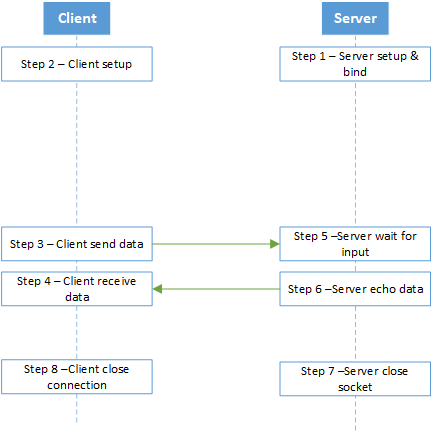

Food for thought:
* How would a server know that a client is done -- that is, will not be sending any more packets?
* What are the guaranteed behaviors for SOCK_STREAM vs. SOCK_DGRAM sockets?
    * SOCK_STREAM -- packet order, no duplicates, timeouts, retransmission
        * At the application level, you cannot make assumptions that you will get *all* requested data on a read().  You will have to keep track of this!
        * Similar for sending data -- the OS level interface to sockets is not guaranteed to send all the data provided in the buffer at every call -- it returns the number of bytes actually written to the network.  You would have to keep track of this, or use the Python sockets call 'socket.sendall' which takes care of this for you.
    * SOCK_DGRAM -- None, really...  If you care, you will have to write your own.  Or use a SOCK_STREAM socket.
        * The application is guaranteed to get all the data sent...  If it gets it at all.
    * For most real-world applications, neither of these Quality of Service guarantees are sufficient for robust communications.  You will typically need to implement some level 7 (Application Layer) behaviors

# Wireshark

Wireshark is an incredibly useful tool for examining network traffic.  I have provided a walkthrough on how to install wireshark and some basic pointers on how to get it running.  I have also used it on both the TCP and UDP socket examples.  To run the walkthrough, open the [Wireshark](./02d%20Wireshark.ipynb) notebook.

Food for thought:
* Why is are there no Wireshark traces when either the client or the server closes the connection or socket?
* Whenever I look at a complete traffic dump off of my system from Wireshark, I am amazed at the amount of network traffic.  It is kinda scary.  It is even more scary when you think of the amount of traffic that is routed to endpoints outside of the local network.

# Multiple client connections

The examples shown above illustrate a single client connecting to the servers.  This is not the case in the real world -- typical servers need to be able to handle many client connections.  I have provided some examples of how to write your servers to manage multiple connections.

There are two considerations the server must address to handle multiple simultaneous client connections:
1. The server must keep track of which client is sending data.  At the very least, the server will use this to send any reply data (if any).  Other reasons for the server to identify which client sends data include maintaining security contexts, "shopping carts", and similar context related information.
1. As we have seen, some system calls (such as accept() and recv()) block, waiting for data from the client.  While the server is blocked on these calls, other clients might need data from other steps in the process.

The examples in the notebooks are set up to show the steps to establish & perform communication on gory detail.  In order to do this, they are written in a style that is not conducive to good software engineering practices.  The notebooks in this section use a more maintainable software style.

It is also rather cumbersome to have multiple client notebooks up at the same time.  To address this, you will need to start a Python CLI, 'cd' to this directory, and run clients from the CLI.  To illustrate multiple clients, you will have to start at least two Python CLI windows, one for each client.

The following notebooks illustrate scenarios for handling multiple client connections:
* [UDPMultiServer](./02h%20UDPMultiServer%20Instructions.ipynb) shows how to handle multiple client connections using UDP sockets;
* [TCPMultiServer](./02g%20TCPMultiServer%20Instructions.ipynb) shows how to handle multiple client connections using TCP sockets.

Food for thought:
* Both the UDPMultiServer and TCPMultiServer programs were designed for simplicity and to illustrate their specific points.  This means they are ignoring other software implementation considerations for "application hygene".  What are some of these considerations, and how could they be addressed?